### Introduction and Background
For this project, I chose to analyze Reddit posts and comments. I intended to use Reddit API to analyze all posts and comments in subreddit r/unitedkingdom by a keyword "refugees" and "Ukrainian refugees" from December 1, 2022, to February 28, 2023, to display trends and topics in Reddit discussions about refugees, and particularly Ukrainian refugees, in the United Kingdom amid rising utility prices. I found a few tutorials for analyzing Reddit API by connecting to Pushshift API. Many of the tutorials seemed very easy to follow, including to search by a keyword and set up a time period; however, neither worked for me :sob:. *If you know how to get this data and would like to help, I would very much appreciate it*

**SO** I used Python Reddit API Wrapper PRAW instead, which allowed me to connect to the Reddit API posts or "submissions" and comments in hot, top, new, rising, controversial, and other categories (read more about the categories [here](https://www.reddit.com/r/help/comments/32eu8w/comment/cqalo9m/?utm_source=reddit&utm_medium=web2x&context=3)). However, I did not find a way to search the submissions and comments by a keyword, although I tried. I was able to connect to subreddit r/unitedkingdom and look at the "rising" posts. From the "rising" posts, I scraped 496 comments, which all happened to be under the **"Anti-monarchy group to stage protest along Charles' coronation route"** submission. I am not absolutely sure why the comments scraped were only from this submission since it was not specified in my code, but it could be due to the limit in the amount of comments that can be loaded when scraping the data. I then created a Pandas DataFrame and a .csv file from the comments obtained, including the title of the submission, parent ID, comment ID, and upvotes per comment.

I used the obtained data to display most upvoted and downvoted comments, search comments associated with "Ukraine" and "Russia" as well as "tax" and "cost" of living, considering the cost of living crisis and support for Ukraine appear to be popular topics in the UK. I then created a **WordCloud** for comments under the post while adjusting stopwords as needed to depict more accurate results. 

I also conducted **Topic Modeling** on the data from "Anti-monarchy group to stage protest along Charles' coronation route" to show fifteen possible topics brought up in the comments. I adjusted the stopwords for the model, as there were many slang words and words with typos not included in the NLTK English-language stopwords dictionary. I also added "protest" to stopwords, as it has a strong emotional value but would inevitably come up in most comments, considering the submission was about a protest specifically. 

*Please see my coding adventures below. I will conclude with the results of my analysis at the bottom. 

#### Scraping Data and Creating a Pandas DataFrame

In [1]:
import praw
#While I looked through several tutorials, I ultimately used PRAW tutorial videos of a YouTube user @sentdex to write my code: https://youtu.be/NRgfgtzIhBQ, https://youtu.be/KX2jvnQ3u60 

In [2]:
import pandas as pd
import json
#importing pandas to be able to create and use Pandas DataFrames

In [3]:
reddit = praw.Reddit(
    client_id="<CLIENT_ID>",
    client_secret="<SECRET>",
    username="<USERNAME>",
    password="<PASSWORD>",
    user_agent="<BOT_NAME>",)

#connecting to Reddit API
#prior to this I had to create a Reddit bot by creating a Reddit app of type "script" here:https://www.reddit.com/prefs/apps/
#the input data is redacted for privacy

In [4]:
subreddit = reddit.subreddit('unitedkingdom')
#specifying which subreddit I would like to connect to

In [5]:
subreddit.title

'United Kingdom'

In [6]:
subreddit.name

't5_2qhqb'

In [66]:
top_uk = subreddit.top(limit=500)

#connecting to top 500 posts at the moment of coding  

In [224]:
rising_uk = subreddit.rising(limit=100)

#connecting to 500 rising posts at the moment of coding

In [278]:
for submission in rising_uk:
    if not submission.stickied:
            print(dir(submission))

#checking which categories are available within the submission, such as "ups" for "upvote" and "title" for "title of the submission"

In [225]:
for submission in rising_uk:
    if not submission.stickied:
            print('Title: {}, ups: {}, num_comments: {}'.format(submission.title,submission.ups,submission.num_comments))
            print(submission)

#viewing a sample of submissions in the "rising" category along with their associated titles, upvotes, and number of comments

Title: School tutoring: One third of £594m post-lockdown cash unspent, ups: 3, num_comments: 0
12wzpks
Title: Who enjoyed that., ups: 3089, num_comments: 1602
12w9zg2
Title: Ban all gambling adverts, say more than half of Britons | Gambling, ups: 1321, num_comments: 153
12wj1tj
Title: Emergency alert: Three responds after phone users complain they did not receive test, ups: 317, num_comments: 180
12wfzo5
Title: Diane Abbott accused of 'hateful antisemitism' after suggesting Jews do not face racism, ups: 897, num_comments: 973
12w3thb
Title: BBC News - Diane Abbott suspended as Labour MP after racism letter, ups: 729, num_comments: 390
12w4dpg
Title: Extremely strong aurora in the UK right now…, ups: 153, num_comments: 43
12wloun
Title: Keir Starmer channels Tony Blair with chilling warning that the NHS 'won't survive' a Tory election victory - as he vows to bring back top-down targets, ups: 559, num_comments: 215
12w2vjn
Title: Nurses’ leader blasts Steve Barclay over ‘disgraceful’ use


We can see that the post **"Anti-monarchy group to stage protest along Charles' coronation route"** had 801 comments at the moment of coding. Two other submissions in the rising category had 973 and 1602 comments respectively, but, perhaps, the "Anti-Monarchy..." submission had fastest growing comment section when I was scraping the comments. 


In [222]:
comments = submission.comments.list()
for comment in comments: 
        print(30*'-')
        print('Parent ID:', comment.parent())
        print('Comment ID:', comment.id)
        print(comment.body)

#we are connecting to and displaying comments, along with associated Parent ID and Comment ID 

------------------------------
Parent ID: 12wj1tj
Comment ID: jhezkg4
It seems like such a straight forward decision but I guess the gambling companies have been bribing, sorry- consulting, with MPs way too much for it to be deemed possible
------------------------------
Parent ID: 12wj1tj
Comment ID: jhf5jwb
It's one of the most fatal addictions and the amount of temptations has gone completely out of control. Feels like on any high street there's more places to gamble than basically do anything else. And that's before talking about the constant marketing everywhere.
------------------------------
Parent ID: 12wj1tj
Comment ID: jhfa7q9
I hate the tv ads that show people ‘partying’ together - reality some person sat at home alone throwing their rent & food money down the pan
------------------------------
Parent ID: 12wj1tj
Comment ID: jhf91jg
Didn’t see gambling addiction until I was in my early twenties and I worked with a bloke who had mentioned he “shouldn’t be gambling” or somethi

In [226]:
submission.comments.replace_more(limit=0)
for comment in submission.comments.list(): 
        print(30*'-')
        print('Title:', submission.title)
        print('Parent ID:', comment.parent())
        print('Comment ID:', comment.id)
        print(comment.body)

#we specify that we want the wrapper to open comments beyond "Load More Comments"
#it is unclear whether the above method actually worked considering that I was able to scrape only 496 comments
#we specify that we want to display comments with associated submission title, Parent ID, and Comment ID

------------------------------
Title: Anti-monarchy group to stage protest along Charles' coronation route
Parent ID: 12v9c5a
Comment ID: jhbhxco
I'm sure there will be no heavy-handed overreaction by the police.
------------------------------
Title: Anti-monarchy group to stage protest along Charles' coronation route
Parent ID: 12v9c5a
Comment ID: jhawf8z
How many people do we think are going to be arrested for peacefully protesting this time?
------------------------------
Title: Anti-monarchy group to stage protest along Charles' coronation route
Parent ID: 12v9c5a
Comment ID: jha4o6t
Cant wait for some of the 'Free speech' gang to get upset over this and start the unhinged talk of treason etc.
------------------------------
Title: Anti-monarchy group to stage protest along Charles' coronation route
Parent ID: 12v9c5a
Comment ID: jhdchmy
The Treason Felony Act 1848 makes it illegal to protest for abolition of the monarchy. However, this law is a relic of the past. The Human Rights A

In [232]:
postlist = []
submission.comments.replace_more(limit=0)
for comment in submission.comments.list(): 
        post = {}
        post['Title'] = submission.title
        post['Parent ID'] = comment.parent()
        post['Comment ID'] = comment.id
        post['Upvotes'] = comment.ups
        post['Comment'] = comment.body
        postlist.append(post)

#adding the comments scraped into a list "postlist"
#the code is adapted from AppsLoveWorld website:https://www.appsloveworld.com/pandas/100/211/pulling-reddit-comments-using-python-praw-and-creating-a-dataframe-with-the-resul

In [233]:
postlist
#checking how the list looks

[{'Title': "Anti-monarchy group to stage protest along Charles' coronation route",
  'Parent ID': Submission(id='12v9c5a'),
  'Comment ID': 'jhbhxco',
  'Upvotes': 61,
  'Comment': "I'm sure there will be no heavy-handed overreaction by the police."},
 {'Title': "Anti-monarchy group to stage protest along Charles' coronation route",
  'Parent ID': Submission(id='12v9c5a'),
  'Comment ID': 'jhawf8z',
  'Upvotes': 165,
  'Comment': 'How many people do we think are going to be arrested for peacefully protesting this time?'},
 {'Title': "Anti-monarchy group to stage protest along Charles' coronation route",
  'Parent ID': Submission(id='12v9c5a'),
  'Comment ID': 'jha4o6t',
  'Upvotes': 481,
  'Comment': "Cant wait for some of the 'Free speech' gang to get upset over this and start the unhinged talk of treason etc."},
 {'Title': "Anti-monarchy group to stage protest along Charles' coronation route",
  'Parent ID': Submission(id='12v9c5a'),
  'Comment ID': 'jhdchmy',
  'Upvotes': 23,
  'Com

In [234]:
type(postlist)

list

In [236]:
posts_df = pd.DataFrame(postlist)
#creating a DataFrame

In [237]:
posts_df

#displaying the DataFrame

Title Parent ID Comment ID  \
0    Anti-monarchy group to stage protest along Cha...   12v9c5a    jhbhxco   
1    Anti-monarchy group to stage protest along Cha...   12v9c5a    jhawf8z   
2    Anti-monarchy group to stage protest along Cha...   12v9c5a    jha4o6t   
3    Anti-monarchy group to stage protest along Cha...   12v9c5a    jhdchmy   
4    Anti-monarchy group to stage protest along Cha...   12v9c5a    jha3qhu   
..                                                 ...       ...        ...   
491  Anti-monarchy group to stage protest along Cha...   jhdhz8q    jhdluy9   
492  Anti-monarchy group to stage protest along Cha...   jhbffoh    jhbkgz0   
493  Anti-monarchy group to stage protest along Cha...   jhbi2we    jhbvrr6   
494  Anti-monarchy group to stage protest along Cha...   jhbczrc    jhbjn80   
495  Anti-monarchy group to stage protest along Cha...   jhbmk76    jhbnqfs   

     Upvotes                                            Comment  
0         61  I'm sure there will be no heavy-handed overrea...  
1        165  How many people do we think are going to be ar...  
2        481  Cant wait for some of the 'Free speech' gang t...  
3         23  The Treason Felony Act 1848 makes it illegal t...  
4        576  Then watch as the right to peaceful protest is...  
..       ...                                                ...  
491        5    Yeah, cause you are wrong and out of arguments.  
492        3            No idea what this non sequitur is about  
493        4  Lol - tankie. Won't be their land when they're...  
494        2  I'll bite.\n\nSure, and then we can all point ...  
495        4  By constantly I mean about 20 long years that ...  

[496 rows x 5 columns]

In [238]:
posts_df.to_csv('Anti_Monarchy.csv') 

#creating a .csv file from the DataFrame to save the data collected
#I used the following tutorial: https://www.scaler.com/topics/list-to-csv-python/ 

In [239]:
posts_df.sort_values(by='Upvotes', ascending=False)[:10]

#now we sort the DataFrame by comments with the greatest number of upvotes
#showing top 10 

Title Parent ID Comment ID  \
4    Anti-monarchy group to stage protest along Cha...   12v9c5a    jha3qhu   
2    Anti-monarchy group to stage protest along Cha...   12v9c5a    jha4o6t   
5    Anti-monarchy group to stage protest along Cha...   12v9c5a    jhae1l5   
141  Anti-monarchy group to stage protest along Cha...   jhaa6fx    jhaeb6u   
1    Anti-monarchy group to stage protest along Cha...   12v9c5a    jhawf8z   
6    Anti-monarchy group to stage protest along Cha...   12v9c5a    jhblis5   
102  Anti-monarchy group to stage protest along Cha...   jha7753    jha99eh   
44   Anti-monarchy group to stage protest along Cha...   jha4o6t    jhb1b1z   
40   Anti-monarchy group to stage protest along Cha...   jhawf8z    jhb3ceh   
68   Anti-monarchy group to stage protest along Cha...   jhb9ogx    jhbgsxz   

     Upvotes                                            Comment  
4        576  Then watch as the right to peaceful protest is...  
2        481  Cant wait for some of the 'Free speech' gang t...  
5        208  The same people that have an issue with this w...  
141      200  Past events from last year id guess. A guy got...  
1        165  How many people do we think are going to be ar...  
6        120  Good. It's an absolute joke that with the incr...  
102      110  That's kind of the point of protest though. Th...  
44        93          The Mail will have a field day with this.  
40        85  More than one. Dissent is getting ever less po...  
68        84  Nah we'd add an extra permanent bank holiday o...

In [240]:
posts_df.sort_values(by='Upvotes', ascending=False)

#sorting by comments with the greatest number of upvotes but now showing 5 top comments and 5 bottom comments with the highest number of downvotes

Title Parent ID Comment ID  \
4    Anti-monarchy group to stage protest along Cha...   12v9c5a    jha3qhu   
2    Anti-monarchy group to stage protest along Cha...   12v9c5a    jha4o6t   
5    Anti-monarchy group to stage protest along Cha...   12v9c5a    jhae1l5   
141  Anti-monarchy group to stage protest along Cha...   jhaa6fx    jhaeb6u   
1    Anti-monarchy group to stage protest along Cha...   12v9c5a    jhawf8z   
..                                                 ...       ...        ...   
348  Anti-monarchy group to stage protest along Cha...   jhav738    jhawlc2   
56   Anti-monarchy group to stage protest along Cha...   jha3qhu    jhbp8dx   
58   Anti-monarchy group to stage protest along Cha...   jha3qhu    jhaz11x   
227  Anti-monarchy group to stage protest along Cha...   jhbr7ll    jhbspus   
31   Anti-monarchy group to stage protest along Cha...   12v9c5a    jha7753   

     Upvotes                                            Comment  
4        576  Then watch as the right to peaceful protest is...  
2        481  Cant wait for some of the 'Free speech' gang t...  
5        208  The same people that have an issue with this w...  
141      200  Past events from last year id guess. A guy got...  
1        165  How many people do we think are going to be ar...  
..       ...                                                ...  
348      -39  Welp, i see someone doesn't understand scenariors  
56       -41  Now watch how quickly support for the right to...  
58       -44  I mean, since when are peaceful protests allow...  
227      -45  so its only a legitimate peaceful protest when...  
31       -99  I wondered how long it would be before they wo...  

[496 rows x 5 columns]

In [242]:
posts_df = posts_df[['Title', 'Upvotes', 'Comment']]

#keeping only the columns we need 

In [243]:
posts_df

#displaying cleaner DataFrame

Title  Upvotes  \
0    Anti-monarchy group to stage protest along Cha...       61   
1    Anti-monarchy group to stage protest along Cha...      165   
2    Anti-monarchy group to stage protest along Cha...      481   
3    Anti-monarchy group to stage protest along Cha...       23   
4    Anti-monarchy group to stage protest along Cha...      576   
..                                                 ...      ...   
491  Anti-monarchy group to stage protest along Cha...        5   
492  Anti-monarchy group to stage protest along Cha...        3   
493  Anti-monarchy group to stage protest along Cha...        4   
494  Anti-monarchy group to stage protest along Cha...        2   
495  Anti-monarchy group to stage protest along Cha...        4   

                                               Comment  
0    I'm sure there will be no heavy-handed overrea...  
1    How many people do we think are going to be ar...  
2    Cant wait for some of the 'Free speech' gang t...  
3    The Treason Felony Act 1848 makes it illegal t...  
4    Then watch as the right to peaceful protest is...  
..                                                 ...  
491    Yeah, cause you are wrong and out of arguments.  
492            No idea what this non sequitur is about  
493  Lol - tankie. Won't be their land when they're...  
494  I'll bite.\n\nSure, and then we can all point ...  
495  By constantly I mean about 20 long years that ...  

[496 rows x 3 columns]

In [244]:
posts_df.sort_values(by='Upvotes', ascending=False)[:10]

Title  Upvotes  \
4    Anti-monarchy group to stage protest along Cha...      576   
2    Anti-monarchy group to stage protest along Cha...      481   
5    Anti-monarchy group to stage protest along Cha...      208   
141  Anti-monarchy group to stage protest along Cha...      200   
1    Anti-monarchy group to stage protest along Cha...      165   
6    Anti-monarchy group to stage protest along Cha...      120   
102  Anti-monarchy group to stage protest along Cha...      110   
44   Anti-monarchy group to stage protest along Cha...       93   
40   Anti-monarchy group to stage protest along Cha...       85   
68   Anti-monarchy group to stage protest along Cha...       84   

                                               Comment  
4    Then watch as the right to peaceful protest is...  
2    Cant wait for some of the 'Free speech' gang t...  
5    The same people that have an issue with this w...  
141  Past events from last year id guess. A guy got...  
1    How many people do we think are going to be ar...  
6    Good. It's an absolute joke that with the incr...  
102  That's kind of the point of protest though. Th...  
44           The Mail will have a field day with this.  
40   More than one. Dissent is getting ever less po...  
68   Nah we'd add an extra permanent bank holiday o...

In [245]:
posts_df.sort_values(by='Upvotes', ascending=False)

Title  Upvotes  \
4    Anti-monarchy group to stage protest along Cha...      576   
2    Anti-monarchy group to stage protest along Cha...      481   
5    Anti-monarchy group to stage protest along Cha...      208   
141  Anti-monarchy group to stage protest along Cha...      200   
1    Anti-monarchy group to stage protest along Cha...      165   
..                                                 ...      ...   
348  Anti-monarchy group to stage protest along Cha...      -39   
56   Anti-monarchy group to stage protest along Cha...      -41   
58   Anti-monarchy group to stage protest along Cha...      -44   
227  Anti-monarchy group to stage protest along Cha...      -45   
31   Anti-monarchy group to stage protest along Cha...      -99   

                                               Comment  
4    Then watch as the right to peaceful protest is...  
2    Cant wait for some of the 'Free speech' gang t...  
5    The same people that have an issue with this w...  
141  Past events from last year id guess. A guy got...  
1    How many people do we think are going to be ar...  
..                                                 ...  
348  Welp, i see someone doesn't understand scenariors  
56   Now watch how quickly support for the right to...  
58   I mean, since when are peaceful protests allow...  
227  so its only a legitimate peaceful protest when...  
31   I wondered how long it would be before they wo...  

[496 rows x 3 columns]

In [246]:
posts_df.sort_values(by='Upvotes', ascending=True)[:10]

#looking at the bottom 10 comments with the highest number of downvotes

Title  Upvotes  \
31   Anti-monarchy group to stage protest along Cha...      -99   
227  Anti-monarchy group to stage protest along Cha...      -45   
58   Anti-monarchy group to stage protest along Cha...      -44   
56   Anti-monarchy group to stage protest along Cha...      -41   
348  Anti-monarchy group to stage protest along Cha...      -39   
36   Anti-monarchy group to stage protest along Cha...      -37   
39   Anti-monarchy group to stage protest along Cha...      -34   
35   Anti-monarchy group to stage protest along Cha...      -34   
57   Anti-monarchy group to stage protest along Cha...      -33   
225  Anti-monarchy group to stage protest along Cha...      -30   

                                               Comment  
31   I wondered how long it would be before they wo...  
227  so its only a legitimate peaceful protest when...  
58   I mean, since when are peaceful protests allow...  
56   Now watch how quickly support for the right to...  
348  Welp, i see someone doesn't understand scenariors  
36   Country going to ratshit because of corrupt po...  
39   The same lot that celebrated the day of the Qu...  
35   Oh yes im sure his majesty and all the monarch...  
57   Equally, we could argue that the government/st...  
225  It wasn't because he was protesting it, but mo...

In [258]:
pd.set_option('display.max_colwidth', 0)

#changing the column width in the DataFrame to be able to read the comment column entirely

In [259]:
posts_df.sort_values(by='Upvotes', ascending=True)[:10]

#displaying the 10 comments with the highest number of downvotes 

Title  \
31   Anti-monarchy group to stage protest along Charles' coronation route   
227  Anti-monarchy group to stage protest along Charles' coronation route   
58   Anti-monarchy group to stage protest along Charles' coronation route   
56   Anti-monarchy group to stage protest along Charles' coronation route   
348  Anti-monarchy group to stage protest along Charles' coronation route   
36   Anti-monarchy group to stage protest along Charles' coronation route   
39   Anti-monarchy group to stage protest along Charles' coronation route   
35   Anti-monarchy group to stage protest along Charles' coronation route   
57   Anti-monarchy group to stage protest along Charles' coronation route   
225  Anti-monarchy group to stage protest along Charles' coronation route   

     Upvotes  \
31  -99        
227 -45        
58  -44        
56  -41        
348 -39        
36  -37        
39  -34        
35  -34        
57  -33        
225 -30        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Comment  
31   I wondered how long it would be before they would surface. Good luck but don't spoil it for people who want to enjoy the spectacle. (on deaf ears, I know)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
227  so its only a 

##### Comments with most "Downvotes"

Without an in-depth analysis of the comments or the conversation, it appears that the comments with most "Downvotes" are generally against the anti-monarchy protest that happened along King Charles' coronation route. One of the comments with a 30 downvote score suggests that the protest was disrespectful to people mourning Queen Elizabeth II. Another comment with a 45 downvote score states that the protest is a "personal harassment" of King Charles. 

In [260]:
posts_df.sort_values(by='Upvotes', ascending=False)[:10]

#displaying the 10 comments with the highest number of upvotes  

Title  \
4    Anti-monarchy group to stage protest along Charles' coronation route   
2    Anti-monarchy group to stage protest along Charles' coronation route   
5    Anti-monarchy group to stage protest along Charles' coronation route   
141  Anti-monarchy group to stage protest along Charles' coronation route   
1    Anti-monarchy group to stage protest along Charles' coronation route   
6    Anti-monarchy group to stage protest along Charles' coronation route   
102  Anti-monarchy group to stage protest along Charles' coronation route   
44   Anti-monarchy group to stage protest along Charles' coronation route   
40   Anti-monarchy group to stage protest along Charles' coronation route   
68   Anti-monarchy group to stage protest along Charles' coronation route   

     Upvotes  \
4    576       
2    481       
5    208       
141  200       
1    165       
6    120       
102  110       
44   93        
40   85        
68   84        

                                                                                                                                                                                                           Comment  
4    Then watch as the right to peaceful protest is totally ignored they get dragged away. Can't have the filthy peasants spoiling the big day can we?                                                              
2    Cant wait for some of the 'Free speech' gang to get upset over this and start the unhinged talk of treason etc.                                                                                                
5    The same people that have an issue with this will be the same people that cry about their “free speech” being taken away from them.                                                                            
141  Past events from last year id guess. A guy got arrested and taken to court for saying 'Not my king' is one example.                                                                                            
1    How many people do we think are going to be arrested for peacefully protesting this time?                                                                                                                      
6    Good. It's an absolute joke that with the increase in cost of living, food costs, utilities, petrol, etc, there's one guy in London getting carted about in a gold fucking carriage putting on a gold crown!!  
102  That's kind of the point of protest though. There is a very real and ever growing anti monarchy movement in the UK. Protests such as this are inevitable and should not be censored.                           
44   The Mail will have a field day with this.                                                                                                                                                                      
40   More than one. Dissent is getting ever less popular among the ruling class (royals, tories and the newspapers).                                                                                                
68   Nah we'd add an extra permanent bank holiday on the day the monarchy was abolished.

##### Comments with most "Upvotes"

Without an in-depth analysis of the comments or the conversation, it appears that the comments with most "Upvotes" are generally supportive of the anti-monarchy protest, referring to a fundamental right to free speech. Even more so, the popular comments imply that the freedom of speech is fragile in the UK right now. One comment with 85 upvotes states that "dissent is getting ever less popular." Another comment with 200 upvotes brings up a case when someone was purportedly arrested for saying "Not my king." A comment with 165 upvotes assumes that many people would be arrested for this protest. 

Another interesting comment with 120 upvotes commends the protest and states that the coronation is not relevant to the problems of the British people today, such as the cost of living crisis. 

#### Creating a Word Cloud

In [261]:
! conda install -c conda-forge wordcloud

#installing WordCloud 
#the code for this section of the project is adapted from Rebecca Krisel's "API_workshop": https://gist.github.com/rskrisel/4ff9629df9f9d6bf5a638b8ba6c13a68
#the code for this section is also informed by Aman Kharwal's "Word Cloud from a Pandas DataFrame in Python" : https://thecleverprogrammer.com/2021/11/11/word-cloud-from-a-pandas-dataframe-in-python/ 

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1




In [266]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#importing necessary libraries

In [267]:
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

#importing more of the necessary libraries

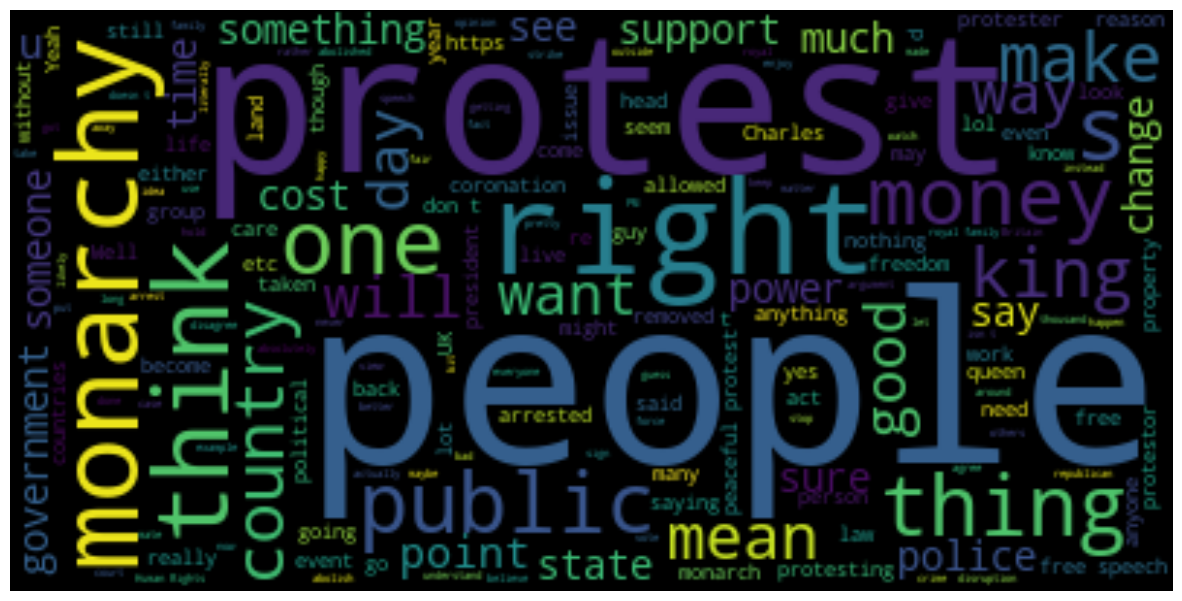

In [272]:
comment = " ".join(i for i in posts_df.Comment)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(comment)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#generating a word cloud for all words in the comments collected (496) with a black background

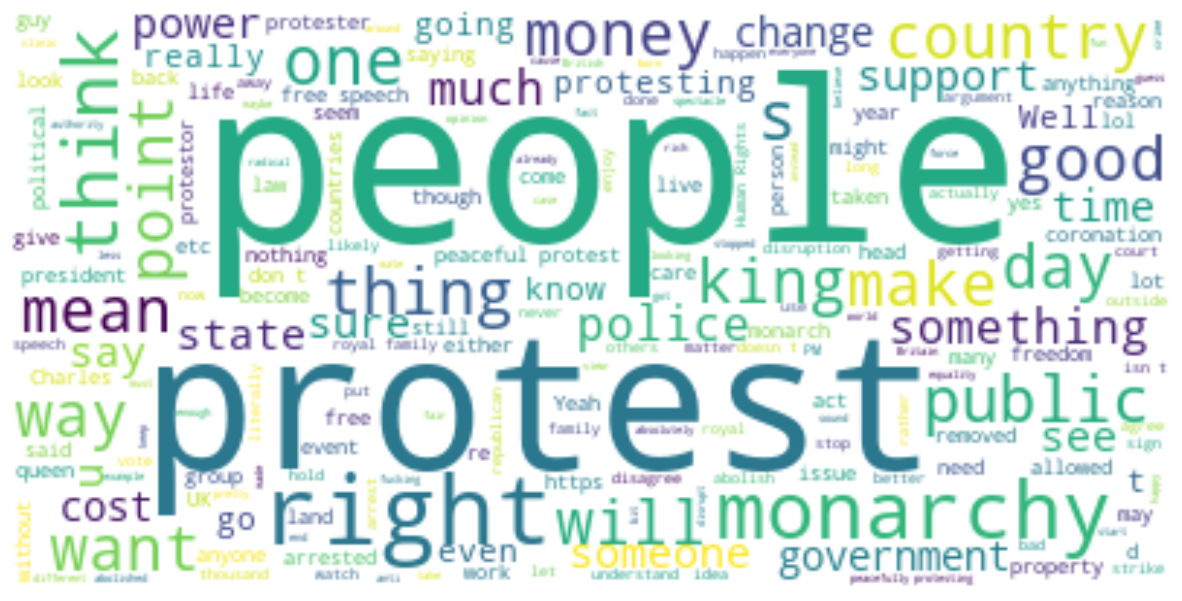

In [273]:
comment = " ".join(i for i in posts_df.Comment)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(comment)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#generating a word cloud for all words in the comments collected (496) with a white background

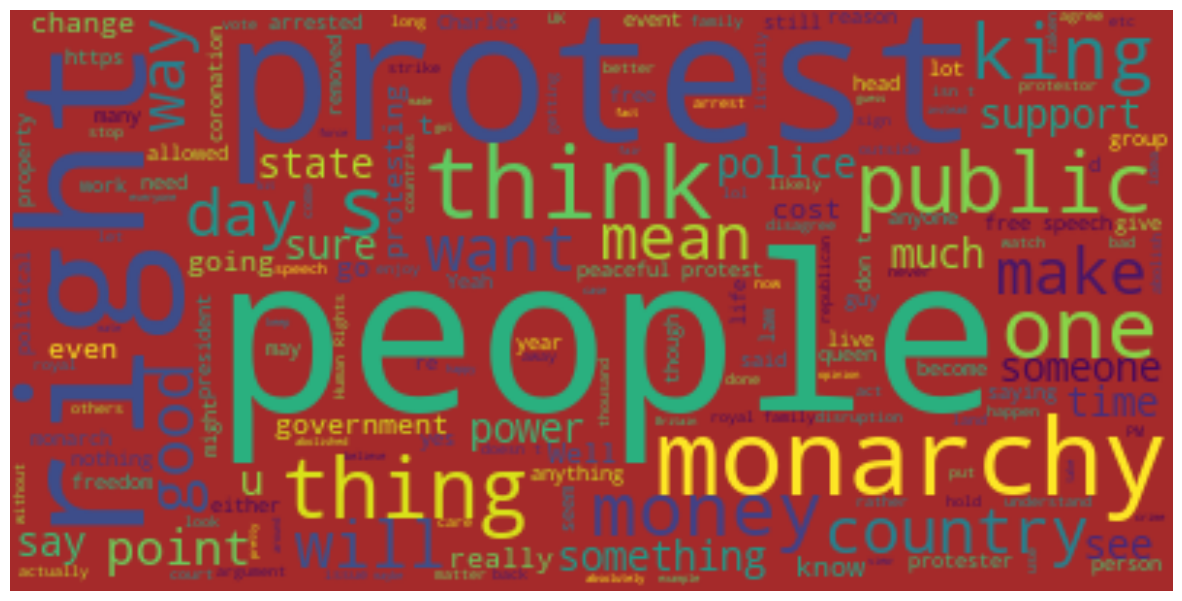

In [276]:
comment = " ".join(i for i in posts_df.Comment)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="brown").generate(comment)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#generating a word cloud for all words in the comments collected (496) with a brown background

##### Generated Word Clouds

As expected, "protest" is one of the most common words in the comments, as the comments directly relate to a submission about a protest. Other words include people, right, government, monarchy, money, and power. While many different topics may be inferred from these word clouds, for me, the comments appear to be associated with two main topics, such as:
- right to freedom of speech and assembly 
and 
- relationship between the public, wealth, and the government or monarchy 

In [284]:
postsU_df = posts_df[posts_df['Comment'].str.contains("Ukraine")]

#I decided to create slices of DataFrames with specific keywords, such as "Ukraine"

In [285]:
postsU_df

#there was only one comment that included "Ukraine"

Title  \
150  Anti-monarchy group to stage protest along Charles' coronation route   

     Upvotes                         Comment  
150  7        Yo Putin, Ukraine is that way.

In [286]:
poststax_df = posts_df[posts_df['Comment'].str.contains("tax")]

#looking at a slice of the DataFrame with a keyword "tax"

In [287]:
poststax_df

#displaying comments that included "tax"

Title  \
10   Anti-monarchy group to stage protest along Charles' coronation route   
17   Anti-monarchy group to stage protest along Charles' coronation route   
28   Anti-monarchy group to stage protest along Charles' coronation route   
86   Anti-monarchy group to stage protest along Charles' coronation route   
191  Anti-monarchy group to stage protest along Charles' coronation route   
202  Anti-monarchy group to stage protest along Charles' coronation route   
255  Anti-monarchy group to stage protest along Charles' coronation route   
291  Anti-monarchy group to stage protest along Charles' coronation route   
364  Anti-monarchy group to stage protest along Charles' coronation route   
408  Anti-monarchy group to stage protest along Charles' coronation route   
444  Anti-monarchy group to stage protest along Charles' coronation route   
445  Anti-monarchy group to stage protest along Charles' coronation route   
446  Anti-monarchy group to stage protest along Charles' coronation route   

     Upvotes  \
10   3         
17   13        
28  -21        
86   3         
191 -18        
202  12        
255  22        
291  1         
364 -1         
408  0         
444  5         
445  2         
446  2         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Comment  
10   Not my King. But it is MY/OUR tax money being thrown away on this stupid rich man festival. \n\nHope they cause some disruption.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [290]:
postsCL_df = posts_df[posts_df['Comment'].str.contains("cost")]
postsCL_df = postsCL_df[['Title', 'Upvotes', 'Comment']]
postsCL_df

#displaying a slice of the DataFrame with a keyword "cost"

Title  \
6    Anti-monarchy group to stage protest along Charles' coronation route   
90   Anti-monarchy group to stage protest along Charles' coronation route   
140  Anti-monarchy group to stage protest along Charles' coronation route   
176  Anti-monarchy group to stage protest along Charles' coronation route   
316  Anti-monarchy group to stage protest along Charles' coronation route   
362  Anti-monarchy group to stage protest along Charles' coronation route   
408  Anti-monarchy group to stage protest along Charles' coronation route   
446  Anti-monarchy group to stage protest along Charles' coronation route   

     Upvotes  \
6    120       
90   1         
140  22        
176  1         
316  1         
362  2         
408  0         
446  2         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Comment  
6    Good. It's an absolute joke that with the increase in cost of living, food costs, utilities, petrol, etc, there's one guy in London getting carted about in a gold fucking carriage putting on a gold crown!!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
90   I mean generally most people don't care about the monarchy \n\nBut a day off is a reason to celebrate\n\nOlder people do still like them in principle\n\nAnd most people realise they make us more money than they cost us with no issues to our governm

In [292]:
postsR_df = posts_df[posts_df['Comment'].str.contains("Russia")]
postsR_df = postsR_df[['Title', 'Upvotes', 'Comment']]
postsR_df

#Displaying a slice of the DataFrame with a keyword "Russia"

Title  \
33   Anti-monarchy group to stage protest along Charles' coronation route   
205  Anti-monarchy group to stage protest along Charles' coronation route   
256  Anti-monarchy group to stage protest along Charles' coronation route   

     Upvotes  \
33  -29        
205 -27        
256  0         

                                                                                                                                                                                                                                                                                                          Comment  
33   Idiots. Some people won't rest until this country is completely destroyed. Brexit wasn't enough for them, Britain must die and be lucky to come out the other end a puppet state of Russia or America.                                                                                                        
205  Hard disagree.\n\n\n\n\nHoodwinked by Russian propaganda the lot of them. Freaks that want Britain to be a nothing state like Laos. Nothing wrong with Laos. Fine country. But Britain is Britain,deteriorating into nothing of significance. \n\n\n\nI'm Irish, so it’s good news for us when you collapse.  
256  Like the president of the CCP in China? Or Russia? Both of those countries do not have monarchies.


Interestingly, we got three comments mentioning "Russia", mainly not supportive of the protest.


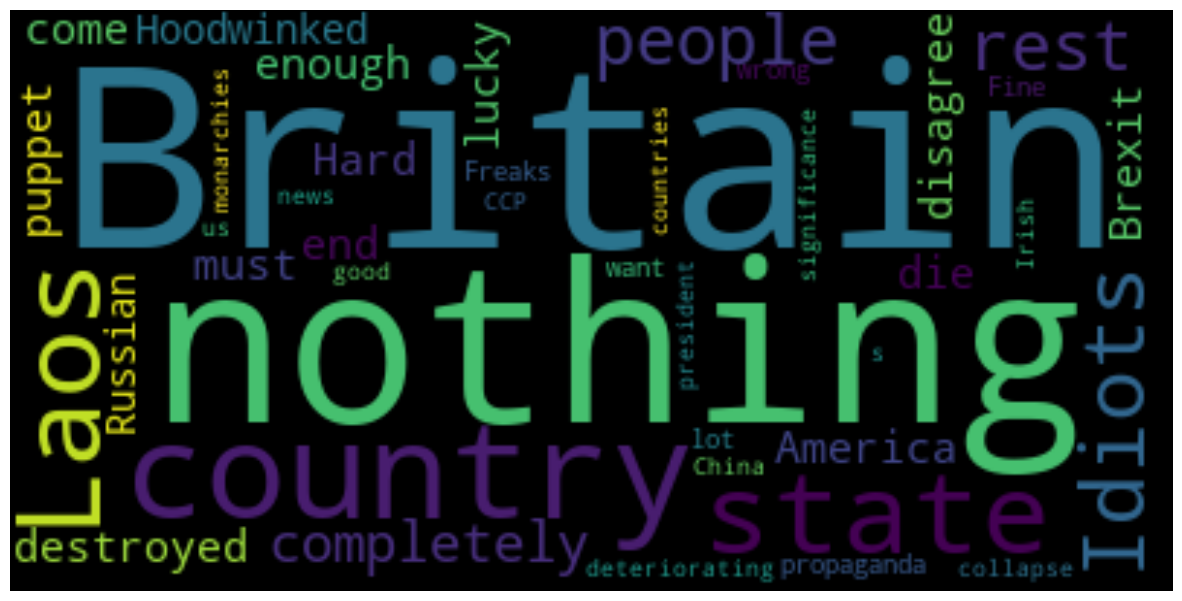

In [293]:
commentR = " ".join(i for i in postsR_df.Comment)
stopwords = STOPWORDS.update(["Russia"])
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(commentR)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#creating a Word Cloud with the three comments mentioning "Russia"
#including "Russia" as a stop word to see which other words summarize the three comments
#I used answers in here to update the stopwords list: https://stackoverflow.com/questions/53997443/how-to-add-extra-stop-words-in-addition-to-default-stopwords-in-wordcloud 

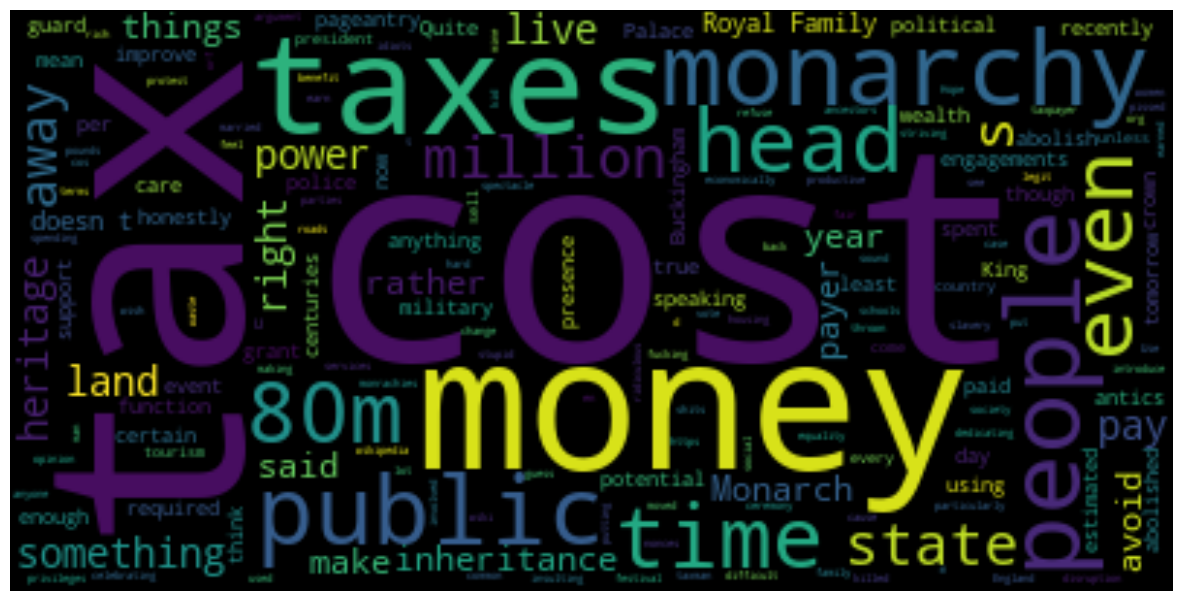

In [294]:
commentT = " ".join(i for i in poststax_df.Comment)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(commentT)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#creating a Word Cloud with the comments mentioning "tax"

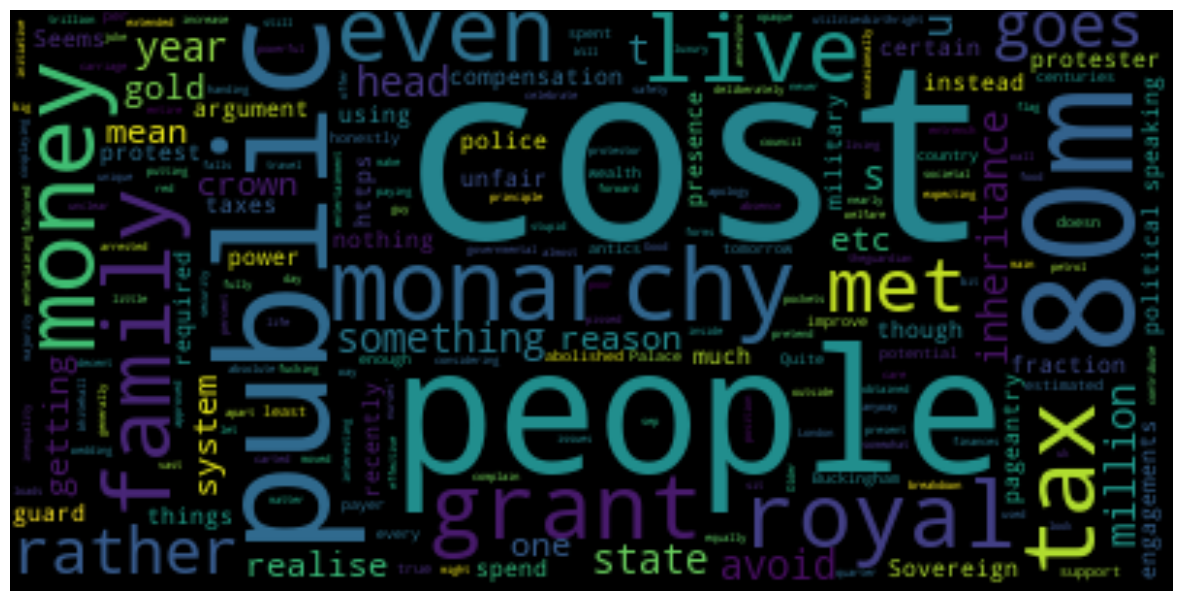

In [295]:
commentCL = " ".join(i for i in postsCL_df.Comment)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(commentCL)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#creating a Word Cloud with the comments mentioning "cost"

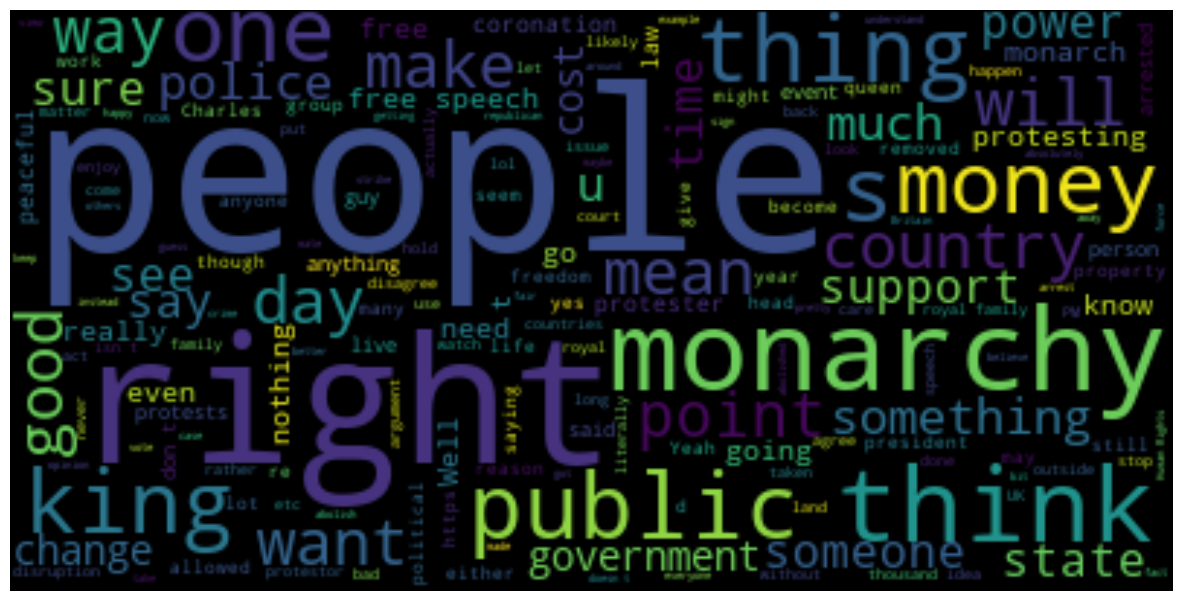

In [296]:
commentNP = " ".join(i for i in posts_df.Comment)
stopwords = STOPWORDS.update(["protest"])
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(commentNP)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#this is a Word Cloud for the entire DataFrame with all comments scraped (496) but removing the word "protest" to see what other words come up

In a cleaned Word Cloud, without the word "protest." Now, even more so, we can see possible dominant topics in the comments. The topics include: 
- the right to peaceful assembly 
- the relationship between the public, money, and the government 

*Of course, the Word Cloud can be interpreted differently by other people*



#### Conducting Topic Modeling on the Reddit Comments

This part of the project is adapted from two tutorials, including ["Topic Modeling — CSV Files" by Melanie Walsh"](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/10-Topic-Modeling-CSV.html) and ["Topic Modeling — With Tomotopy" by Rebecca Krisel](https://github.com/rskrisel/topic_modeling_workshop). However, I used additional tutorials to modify my code and data, as noted in the respective cells. 

In [297]:
!pip install tomotopy

#installing tomotopy

     ---------------------------------------- 5.7/5.7 MB 7.5 MB/s eta 0:00:00


In [298]:
!pip install seaborn

#installing seaborn

In [299]:
import tomotopy as tp
import seaborn
import glob
import pandas as pd
from pathlib import Path
import nltk
from nltk.corpus import stopwords
stops = stopwords.words('english')

#importing necessary libraries, including the list of NLTK stopwords in English language 

In [300]:
comments_df = posts_df[['Comment']]

#creating a slice of the DataFrame to just see the comments, without votes and the title of the submission

In [301]:
comments_df

#displaying the slice of the DataFrame

Comment
0    I'm sure there will be no heavy-handed overreaction by the police.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
1    How many people do we think are going to be arrested for peacefully protesting this time?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
2    Cant wait for some of the 'Free speech' gang to get upset over this and start the unhinged talk of treason etc.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
3    The Treason Felony Act 1848 makes it illegal to protest for abolition of the monarchy. However, this law is a relic of the past. The Human Rights Act 1998 confers the right to Freedom of Speech and Freedom of Assembly and Association to protest. Under the constitutional principle of Sovereignty of Parliament, the latest Act would supersede the older one, even if the Treason Felony Act was not repealed. I doubt the court would convict anyone for protesting for the abolition of the monarchy.\n\nThis is why people should always support Human Rights. These are your guaranteed rights and protections against the government and any other state institution.
4    Then watch as the right to peaceful protest is totally ignored they get dragged away. Can't have the filthy peasants spoiling the big day can we?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
..                                                                                                                                                 ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
491  Yeah, cau

In [302]:
!pip install little_mallet_wrapper

#installing little_mallet_wrapper

In [303]:
!!pip install git+https://github.com/maria-antoniak/little-mallet-wrapper.git
    
#making sure that the little_mallet_wrapper is up-to-date

['Collecting git+https://github.com/maria-antoniak/little-mallet-wrapper.git',
 '  Cloning https://github.com/maria-antoniak/little-mallet-wrapper.git to c:\\users\\mash9\\appdata\\local\\temp\\pip-req-build-nsf2kap5',
 "  Running command git clone --filter=blob:none --quiet https://github.com/maria-antoniak/little-mallet-wrapper.git 'C:\\Users\\mash9\\AppData\\Local\\Temp\\pip-req-build-nsf2kap5'",
 '  Resolved https://github.com/maria-antoniak/little-mallet-wrapper.git to commit 44e8098052c46df6182326dc0e26b86624ccbb9b',
 '  Preparing metadata (setup.py): started',
 "  Preparing metadata (setup.py): finished with status 'done'"]

In [2]:
#my kernel was interrupted, so I had to start over, but it allowed me to have cleaner code

#importing the necessary libraries again

import little_mallet_wrapper
import seaborn
from pathlib import Path
import pandas as pd
import random
import tomotopy as tp
import glob
import nltk
from nltk.corpus import stopwords
stops = stopwords.words('english')
pd.options.display.max_colwidth = 100 
#setting up the column width for the DataFrame, so that we can see all inputs in the cells

#I did not use some of these libraries after all

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stops = stopwords.words('english')

#making sure that the stopwords library is downloaded and up-to-date

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mash9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
stops.extend(["protest", "https", "yeah", "like", "isn", "likely", "could", "aren", "protests", "etc"])

#I am updating the stopwords list to include various words
#These are the words I noticed in the comments and I believe are redundant but not included in the standard stopwords library
#I forgot to include "//www," which later, unfortunately, came up in the topics  
#"protest(s)" are included in the stopwords, considering that all comments would inevitably refer to the protest that occurred and these words do not improve our understanding of what people are talking about in relation to the protest 

In [4]:
posts_df = pd.read_csv("Anti_Monarchy.csv")

#opening the .csv document with comments into a Pandas DataFrame

In [5]:
posts_df

#displaying the DataFrame

Unnamed: 0  \
0             0   
1             1   
2             2   
3             3   
4             4   
..          ...   
491         491   
492         492   
493         493   
494         494   
495         495   

                                                                    Title  \
0    Anti-monarchy group to stage protest along Charles' coronation route   
1    Anti-monarchy group to stage protest along Charles' coronation route   
2    Anti-monarchy group to stage protest along Charles' coronation route   
3    Anti-monarchy group to stage protest along Charles' coronation route   
4    Anti-monarchy group to stage protest along Charles' coronation route   
..                                                                    ...   
491  Anti-monarchy group to stage protest along Charles' coronation route   
492  Anti-monarchy group to stage protest along Charles' coronation route   
493  Anti-monarchy group to stage protest along Charles' coronation route   
494  Anti-monarchy group to stage protest along Charles' coronation route   
495  Anti-monarchy group to stage protest along Charles' coronation route   

    Parent ID Comment ID  Upvotes  \
0     12v9c5a    jhbhxco       61   
1     12v9c5a    jhawf8z      165   
2     12v9c5a    jha4o6t      481   
3     12v9c5a    jhdchmy       23   
4     12v9c5a    jha3qhu      576   
..        ...        ...      ...   
491   jhdhz8q    jhdluy9        5   
492   jhbffoh    jhbkgz0        3   
493   jhbi2we    jhbvrr6        4   
494   jhbczrc    jhbjn80        2   
495   jhbmk76    jhbnqfs        4   

                                                                                                 Comment  
0                                     I'm sure there will be no heavy-handed overreaction by the police.  
1              How many people do we think are going to be arrested for peacefully protesting this time?  
2    Cant wait for some of the 'Free speech' gang to get upset over this and start the unhinged talk ...  
3    The Treason Felony Act 1848 makes it illegal to protest for abolition of the monarchy. However, ...  
4    Then watch as the right to peaceful protest is totally ignored they get dragged away. Can't have...  
..                                                                                                   ...  
491                                                      Yeah, cause you are wrong and out of arguments.  
492                                                              No idea what this non sequitur is about  
493  Lol - tankie. Won't be their land when they're not 'royals'.\n\nNope they visit the palace of Ve...  
494  I'll bite.\n\nSure, and then we can all point and laugh at them until they get tired and give up...  
495  By constantly I mean about 20 long years that Andrew was being best friends with Britain’s bigge...  

[496 rows x 6 columns]

In [20]:
pat = r'\b(?:{})\b'.format('|'.join(stops))
posts_df['Comment_nostops'] = posts_df['Comment'].str.replace(pat, '')
posts_df['Comment_nostops'] = posts_df['Comment_nostops'].str.replace(r'\s+', ' ')

#removing the stopwords from the comments and creating a new DataFrame column with cleaned comments 
#the code is adapted from answers in here: https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

C:\Users\mash9\AppData\Local\Temp\ipykernel_8832\3003958030.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  posts_df['Comment_nostops'] = posts_df['Comment'].str.replace(pat, '')
C:\Users\mash9\AppData\Local\Temp\ipykernel_8832\3003958030.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  posts_df['Comment_nostops'] = posts_df['Comment_nostops'].str.replace(r'\s+', ' ')


In [21]:
posts_df

#displaying the new DataFrame with the new column of comments with no stopwords 

Unnamed: 0  \
0             0   
1             1   
2             2   
3             3   
4             4   
..          ...   
491         491   
492         492   
493         493   
494         494   
495         495   

                                                                    Title  \
0    Anti-monarchy group to stage protest along Charles' coronation route   
1    Anti-monarchy group to stage protest along Charles' coronation route   
2    Anti-monarchy group to stage protest along Charles' coronation route   
3    Anti-monarchy group to stage protest along Charles' coronation route   
4    Anti-monarchy group to stage protest along Charles' coronation route   
..                                                                    ...   
491  Anti-monarchy group to stage protest along Charles' coronation route   
492  Anti-monarchy group to stage protest along Charles' coronation route   
493  Anti-monarchy group to stage protest along Charles' coronation route   
494  Anti-monarchy group to stage protest along Charles' coronation route   
495  Anti-monarchy group to stage protest along Charles' coronation route   

    Parent ID Comment ID  Upvotes  \
0     12v9c5a    jhbhxco       61   
1     12v9c5a    jhawf8z      165   
2     12v9c5a    jha4o6t      481   
3     12v9c5a    jhdchmy       23   
4     12v9c5a    jha3qhu      576   
..        ...        ...      ...   
491   jhdhz8q    jhdluy9        5   
492   jhbffoh    jhbkgz0        3   
493   jhbi2we    jhbvrr6        4   
494   jhbczrc    jhbjn80        2   
495   jhbmk76    jhbnqfs        4   

                                                                                                 Comment  \
0                                                             I'm sure heavy-handed overreaction police.   
1                                       How many people think going arrested peacefully protesting time?   
2                                Cant wait 'Free speech' gang get upset start unhinged talk treason etc.   
3    The Treason Felony Act 1848 makes illegal abolition monarchy. However, law relic past. The Human...   
4    Then watch right peaceful totally ignored get dragged away. Can't filthy peasants spoiling big d...   
..                                                                                                   ...   
491                                                                         Yeah, cause wrong arguments.   
492                                                                                 No idea non sequitur   
493       Lol - tankie. Won't land they're 'royals'. Nope visit palace Versailles, palace without King 😮   
494      I'll bite. Sure, point laugh get tired give up. And yes, I'd expect response anti-monarchy too.   
495  By constantly I mean 20 long years Andrew best friends Britain’s biggest paedo Saville also 20 y...   

                                                                                         Comment_nostops  
0                                                              I' sure heavy-handed overreaction police.  
1                                       How many people think going arrested peacefully protesting time?  
2                                   Cant wait 'Free speech' gang get upset start unhinged talk treason .  
3    The Treason Felony Act 1848 makes illegal abolition monarchy. However, law relic past. The Human...  
4    Then watch right peaceful totally ignored get dragged away. Can' filthy peasants spoiling big day ?  
..                                                                                                   ...  
491                                                                         Yeah, cause wrong arguments.  
492                                                                                 No idea non sequitur  
493              Lol - tankie. Won' land ' 'royals'. Nope visit palace Versailles, palace without King 😮  
494              I' bite. Sure, point l

In [25]:
posts_df = posts_df[['Comment', 'Upvotes', 'Comment_nostops' ]]

#changing the DataFrame to only show the three columns of comments, associated upvotes, and comments with no stopwords

In [26]:
posts_df

#displaying the new DataFrame

Comment  \
0                                                             I'm sure heavy-handed overreaction police.   
1                                       How many people think going arrested peacefully protesting time?   
2                                Cant wait 'Free speech' gang get upset start unhinged talk treason etc.   
3    The Treason Felony Act 1848 makes illegal abolition monarchy. However, law relic past. The Human...   
4    Then watch right peaceful totally ignored get dragged away. Can't filthy peasants spoiling big d...   
..                                                                                                   ...   
491                                                                         Yeah, cause wrong arguments.   
492                                                                                 No idea non sequitur   
493       Lol - tankie. Won't land they're 'royals'. Nope visit palace Versailles, palace without King 😮   
494      I'll bite. Sure, point laugh get tired give up. And yes, I'd expect response anti-monarchy too.   
495  By constantly I mean 20 long years Andrew best friends Britain’s biggest paedo Saville also 20 y...   

     Upvotes  \
0         61   
1        165   
2        481   
3         23   
4        576   
..       ...   
491        5   
492        3   
493        4   
494        2   
495        4   

                                                                                         Comment_nostops  
0                                                              I' sure heavy-handed overreaction police.  
1                                       How many people think going arrested peacefully protesting time?  
2                                   Cant wait 'Free speech' gang get upset start unhinged talk treason .  
3    The Treason Felony Act 1848 makes illegal abolition monarchy. However, law relic past. The Human...  
4    Then watch right peaceful totally ignored get dragged away. Can' filthy peasants spoiling big day ?  
..                                                                                                   ...  
491                                                                         Yeah, cause wrong arguments.  
492                                                                                 No idea non sequitur  
493              Lol - tankie. Won' land ' 'royals'. Nope visit palace Versailles, palace without King 😮  
494              I' bite. Sure, point laugh get tired give . And yes, I' expect response anti-monarchy .  
495  By constantly I mean 20 long years Andrew best friends Britain’ biggest paedo Saville also 20 ye...  

[496 rows x 3 columns]

In [27]:
posts_df['Comment_nostops'] = posts_df['Comment_nostops'].astype(str)

#changing the type of the column containing comments without the stopwords to string

C:\Users\mash9\AppData\Local\Temp\ipykernel_8832\4221407082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['Comment_nostops'] = posts_df['Comment_nostops'].astype(str)


In [28]:
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in posts_df['Comment_nostops']]

#defining the training data for the model we will be using  
#we choose specifically the column that includes comments without the stopwords and further remove numbers from its text

In [31]:
original_texts = [text for text in posts_df['Comment_nostops']]

#saving the original text of the comments without the stopwords that includes numbers in original_texts variable

In [32]:
little_mallet_wrapper.print_dataset_stats(training_data)

#we can display how many documents are now recognized by the wrapper as training data
#each comment is treated as one document
#it also shows us how many words on average a Reddit user used when commenting 
#it also shows us how many unique words are in the comments total

Number of Documents: 496
Mean Number of Words per Document: 13.6
Vocabulary Size: 2375


In [33]:
little_mallet_wrapper.print_dataset_stats(original_texts)

#same as above but includes numbers as words in the vocabulary 

Number of Documents: 496
Mean Number of Words per Document: 16.2
Vocabulary Size: 3383


In [34]:
training_data = training_data

#specifying the training_data

In [73]:
num_topics = 15

#choosing the number of topics we want the output to be

In [88]:
num_topic_words = 8

#number of words to be displayed per topic

In [95]:
model = tp.LDAModel(k=num_topics)

#specifying the model
#below, we run the model on the training_data we specified 

In [96]:
for text in training_data:
    model.add_doc(text.strip().split())

In [97]:
print("Topic Model Training...\n\n")

Topic Model Training...




In [98]:
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Iteration: 0	Log-likelihood: -8.785513803930172
Iteration: 10	Log-likelihood: -8.669920027619455
Iteration: 20	Log-likelihood: -8.612956019188236
Iteration: 30	Log-likelihood: -8.58456282207719
Iteration: 40	Log-likelihood: -8.56404913943272
Iteration: 50	Log-likelihood: -8.545987039024386
Iteration: 60	Log-likelihood: -8.544921444213724
Iteration: 70	Log-likelihood: -8.522892442533546
Iteration: 80	Log-likelihood: -8.512077229911908
Iteration: 90	Log-likelihood: -8.496682512208793


In [99]:
print("\nTopic Model Results:\n\n")


Topic Model Results:




In [100]:
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

#Displaying 15 topics the model inferred from 496 comments we trained it on
#I ran the model several times to get some topics that make a bit more sense 

✨Topic 0✨

people change police ever protestors getting countries guess

✨Topic 1✨

way power even monarch one things get monarchy

✨Topic 2✨

monarchy country government people nothing make property actually

✨Topic 3✨

state taken comment head person court personal understand

✨Topic 4✨

family royal cost tax better crown land costs

✨Topic 5✨

someone point king may charles well long done

✨Topic 6✨

law would see coronation abortion outside peaceful clinic

✨Topic 7✨

think protesting one said people arrested see years

✨Topic 8✨

protesters //www starmer yeah keep going party back

✨Topic 9✨

right day rights support want say know peaceful

✨Topic 10✨

right yes feel threatened fucking public arrest otherwise

✨Topic 11✨

people mean something might still though around since

✨Topic 12✨

would money public good get lol monarchy removed

✨Topic 13✨

much anything life sure really king money saying

✨Topic 14✨

free speech think get either freedom lot disagree



##### Generated Topics

Some topics come out better than others, and I, frankly, had a better set of topics during one of the previous attempts to run the model. However, let us see what topics we obtained and how they relate to the two topics inferred from the Word Cloud :mag: :sparkles:. As a reminder, the topics were:
- right to freedom of speech and assembly 
and 
- relationship between the public, wealth, and the government or monarchy 

Below, I am summarizing the topics created by the model while noting the words listed by the model in a sub-bullet: 
- Topic 0: Protests represent a call for change  
    - people change police ever protestors getting countries guess
- Topic 1: The role of monarchy and its power in the UK
    - way power even monarch one things get monarchy
- Topic 2: The relationship between people's wealth and property and the government or monarchy 
    - monarchy country government people nothing make property actually
- Topic 3: The role of the state (*To be honest, I am not completely sure with this one*)
    - state taken comment head person court personal understand
- Topic 4: The relationship between the costs imposed on the public and the royal family
    - family royal cost tax better crown land costs
- Topic 5: *Perhaps* Monarchy is outdated
    - someone point king may charles well long done
- Topic 6: Peaceful protest is an equal right of the people, regardless the issue
    - law would see coronation abortion outside peaceful clinic
- Topic 7: The right to peaceful protest is in jeopardy and is not equally distributed   
    - think protesting one said people arrested see years
- Topic 8: *Possibly* Enthusiasm about the protest
    - protesters //www starmer yeah keep going party back
- Topic 9: Support of the right to peaceful protest
    - right day rights support want say know peaceful
- Topic 10: The right to peaceful protest is in jeopardy
    - right yes feel threatened fucking public arrest otherwise
- Topic 11: If people are protesting, they, perhaps, have a point
    - people mean something might still though around since
- Topic 12: Discussion of the relationship between the public, money, and monarchy and, perhaps, support of the protest
    - would money public good get lol monarchy removed
- Topic 13: Discussion of the role of the King (*took me a second to think about this one)
    - much anything life sure really king money saying
- Topic 14: Right to freedom of speech and to disagree 
    - free speech think get either freedom lot disagree

*Please note that this is my interpretation of the topics and they can be understood differently by other people* 

As we can see, **generally**, the topics are similar to those inferred from the Word Cloud I created for the comments.

Noting that, when thinking of the topics inferred from the Word Cloud, I already had a hindsight of seeing these fifteen topics and have read through the comments to get a general idea of what the actual conversation is.    

The topics are further not reflective of **all** comments under the submission. Especially, as we only analyzed 496 comments out of over 800. In particular, the topics appear not to reflect the most "downvoted" comments. In the most "downvoted" comments, we saw that Reddit users expressed their discontent with the protest and called it a disrespectful act towards the memory of Queen Elizabeth II and a personal harassment towards King Charles, which is not reflected in the 15 topics generated.   


In [101]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

#I ran topic_distribution function to show how topics relate to a sample of individual comments

In [102]:
from IPython.display import Markdown, display

#importing Markdown, display

In [103]:
import re

#importing re

In [104]:
def make_md(string):
    display(Markdown(str(string)))

#defining a new function

In [106]:
def get_top_docs(docs, topic_distributions, topic_index, n=5):
    sorted_data = sorted([(_distribution[topic_index], _document) 
                          for _distribution, _document 
                          in zip(topic_distributions, docs)], reverse=True)
    
    topic_words = topics[topic_index]
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n---")
    
    for probability, doc in sorted_data[:n]:
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)
        
        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')
    
    return

#connecting the topics with individual comments and identifying topic probability per comment

In [109]:
get_top_docs(training_data, topic_distributions, topic_index=0, n=6)

#this showed topic 0's probability for a random sample of 6 comments 
#not completely sure why the output is not showing after the notebook was saved and closed once

### ✨Topic 0✨

people change police ever protestors getting countries guess

---

✨  
**Topic Probability**: 0.5223703980445862  
**Document**: point though surely see backwards century middle ages anymore



✨  
**Topic Probability**: 0.4898267388343811  
**Document**: several **countries** constitutional monarchies world best **countries** fact spank britain outer space equality nothing monarchy stop looking excuses fact heart nasty country **change** constitution leadership **ever** **change**



✨  
**Topic Probability**: 0.47592687606811523  
**Document**: british government british **people** overwhelmingly benefit royal properties much seems obvious compromise extend uber rich groups get keep luxurious lifestyle money properties held public trust importantly political activity extremely frowned upon beyond charitable obvious direct national interest imagine much better america would koch political power example



✨  
**Topic Probability**: 0.43057480454444885  
**Document**: **police** going arrest day event release without charge soon event many republican **protestors** day prince williams wedding utterly disgusting attempt suppress right



✨  
**Topic Probability**: 0.4056936502456665  
**Document**: mate categorically made money tourism crown free ambassador work free soft power mention land become public earns far pay holistic view economy monarch without puts worse without literally reason happy monarchy free money work



✨  
**Topic Probability**: 0.3813598155975342  
**Document**: hevans forbid something gets vandalised destroyed non violet peacful field allowed



In [121]:
upvotes_text = [text for text in posts_df['Upvotes']]

#creating a new variable for the upvotes column, treating numbers as text

In [124]:
upvotes_text = [title for title in posts_df['Upvotes']]
target_labels = random.sample(upvotes_text, 6)

#defining the target labels to refer to the "upvotes" column

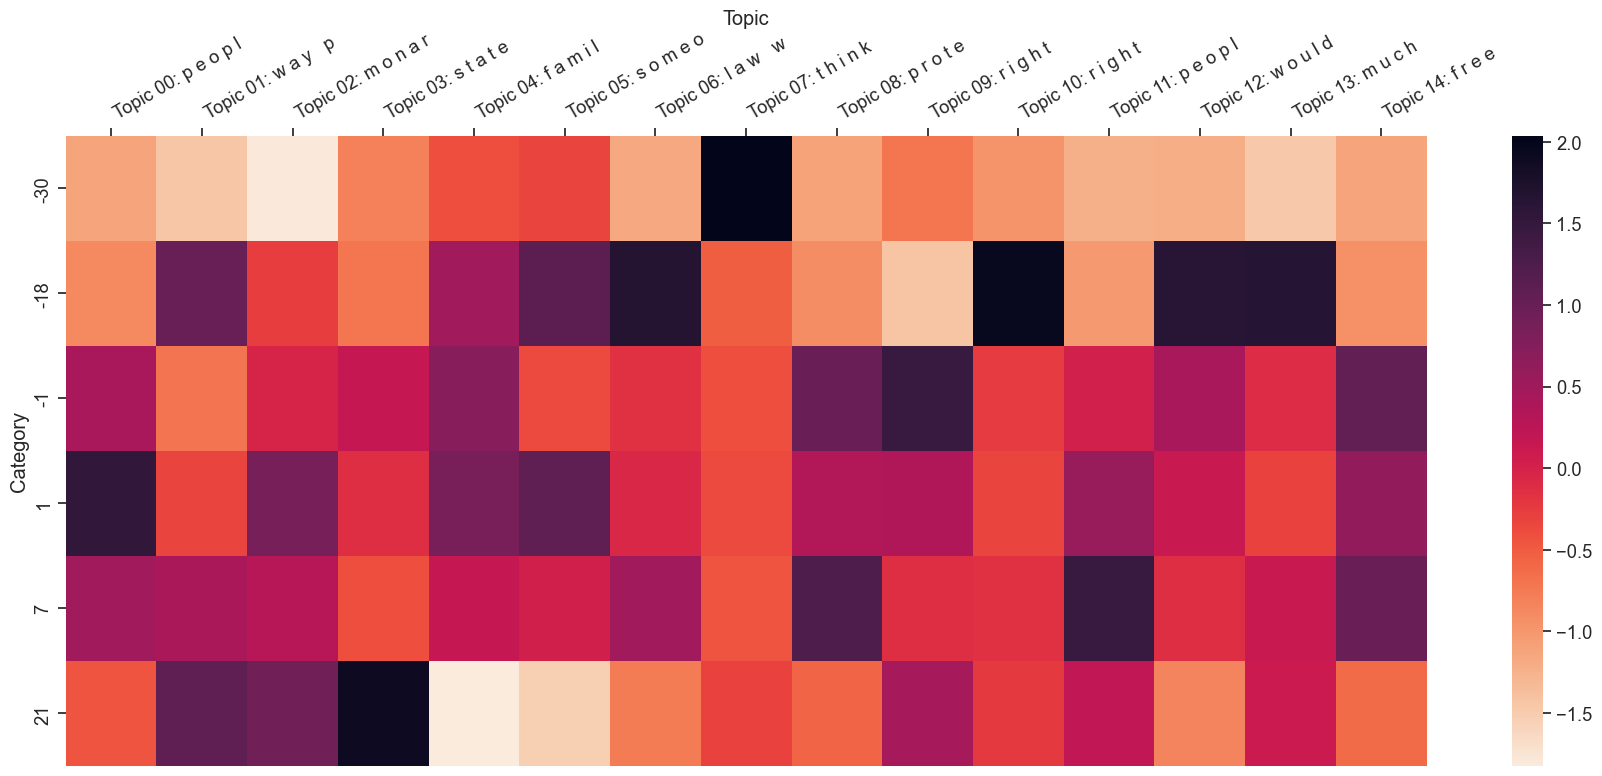

In [128]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(upvotes_text,
                                      topic_distributions,
                                      topics, 
                                      output_path=None,
                                      target_labels=target_labels,
                                      dim= (18, 8)
                                     )

#creating a heatmap that depicts the probability of a topic in relationship to upvotes of a comment  

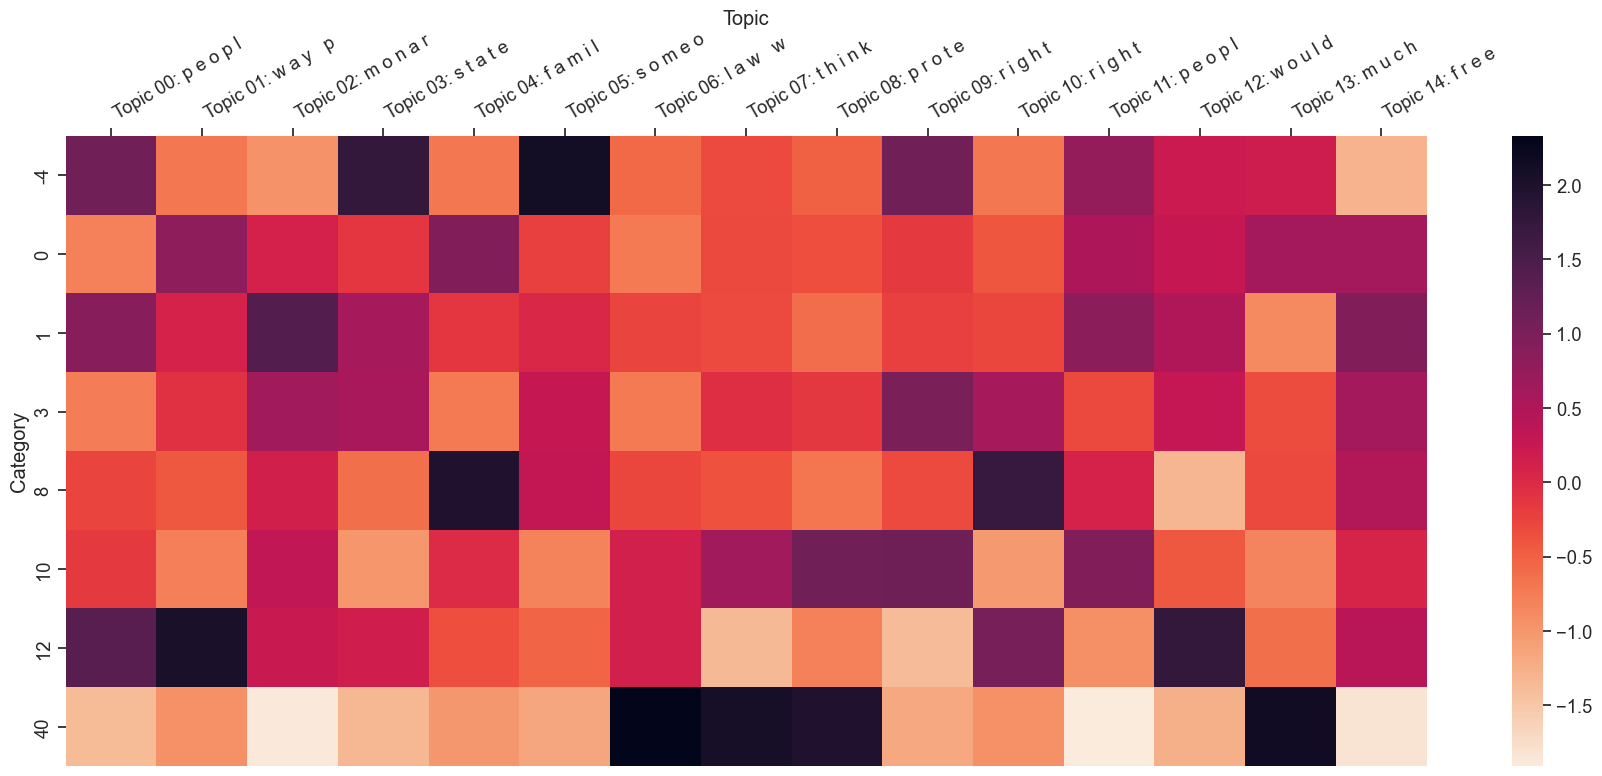

In [131]:
target_labels = random.sample(upvotes_text, 10)
little_mallet_wrapper.plot_categories_by_topics_heatmap(upvotes_text,
                                      topic_distributions,
                                      topics, 
                                      output_path=None,
                                      target_labels=target_labels,
                                      dim= (18, 8)
                                     )

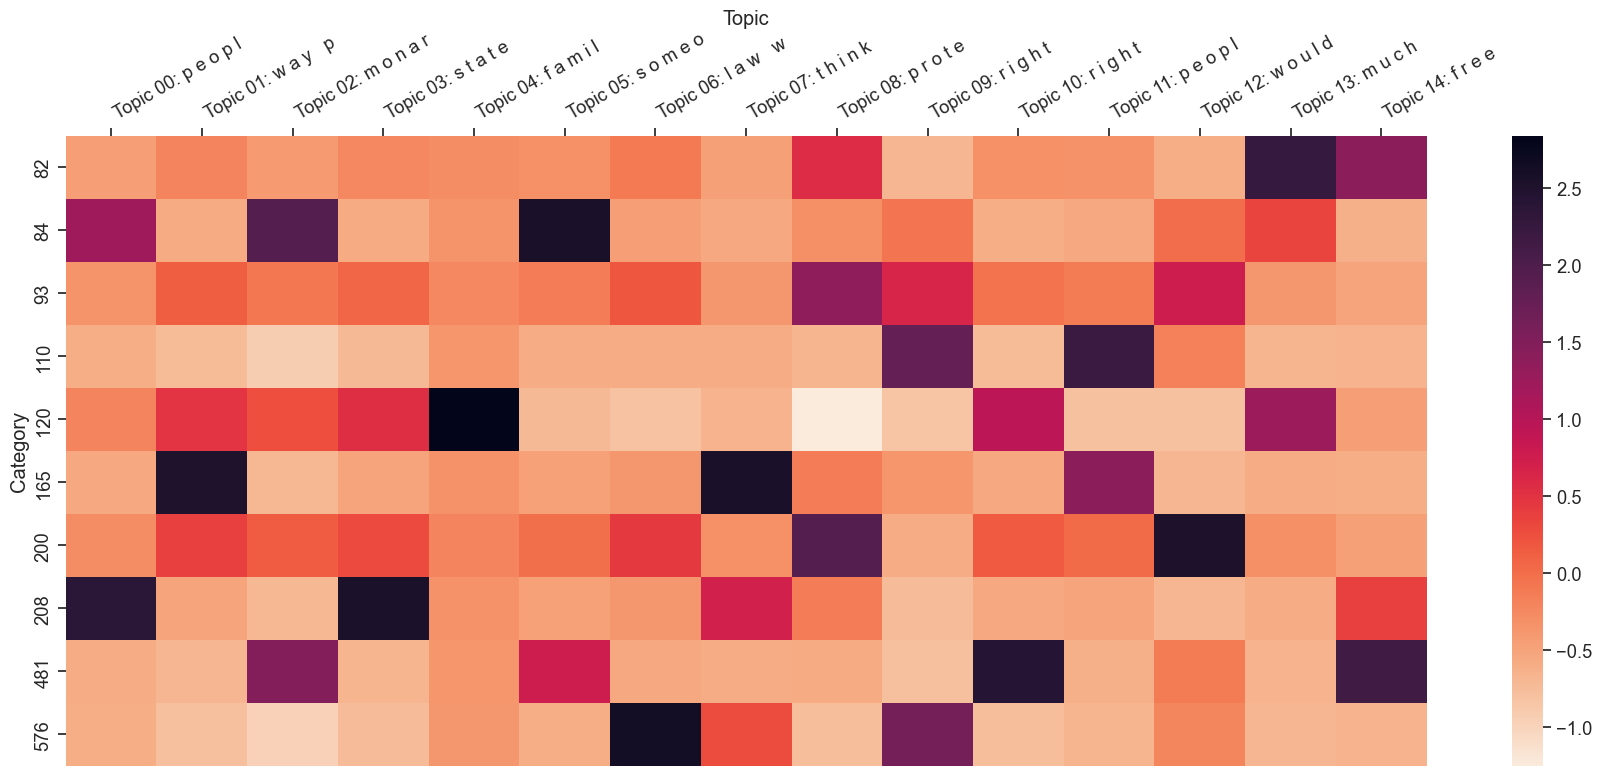

In [134]:
upvotesH_text = [title for title in posts_df['Upvotes'] if title>80]
target_labelS = random.sample(upvotesH_text, 10)
little_mallet_wrapper.plot_categories_by_topics_heatmap(upvotes_text,
                                      topic_distributions,
                                      topics, 
                                      output_path=None,
                                      target_labels=target_labelS,
                                      dim= (18, 8)
                                     )
#I wanted to create a heatmap for comments with the highest number of upvotes specifically, so I specified that the value of the upvotes cells used in the sample has to be over 80  
#My code is informed by: https://learnpython.com/blog/comparison-operators/#:~:text=Many%20programming%20beginners%20wonder%20how,known%20as%20a%20comparison%20operator

In [151]:
training_data_reddit_votes = dict(zip(training_data, upvotes_text))
training_data_original_text = dict(zip(training_data, original_texts))

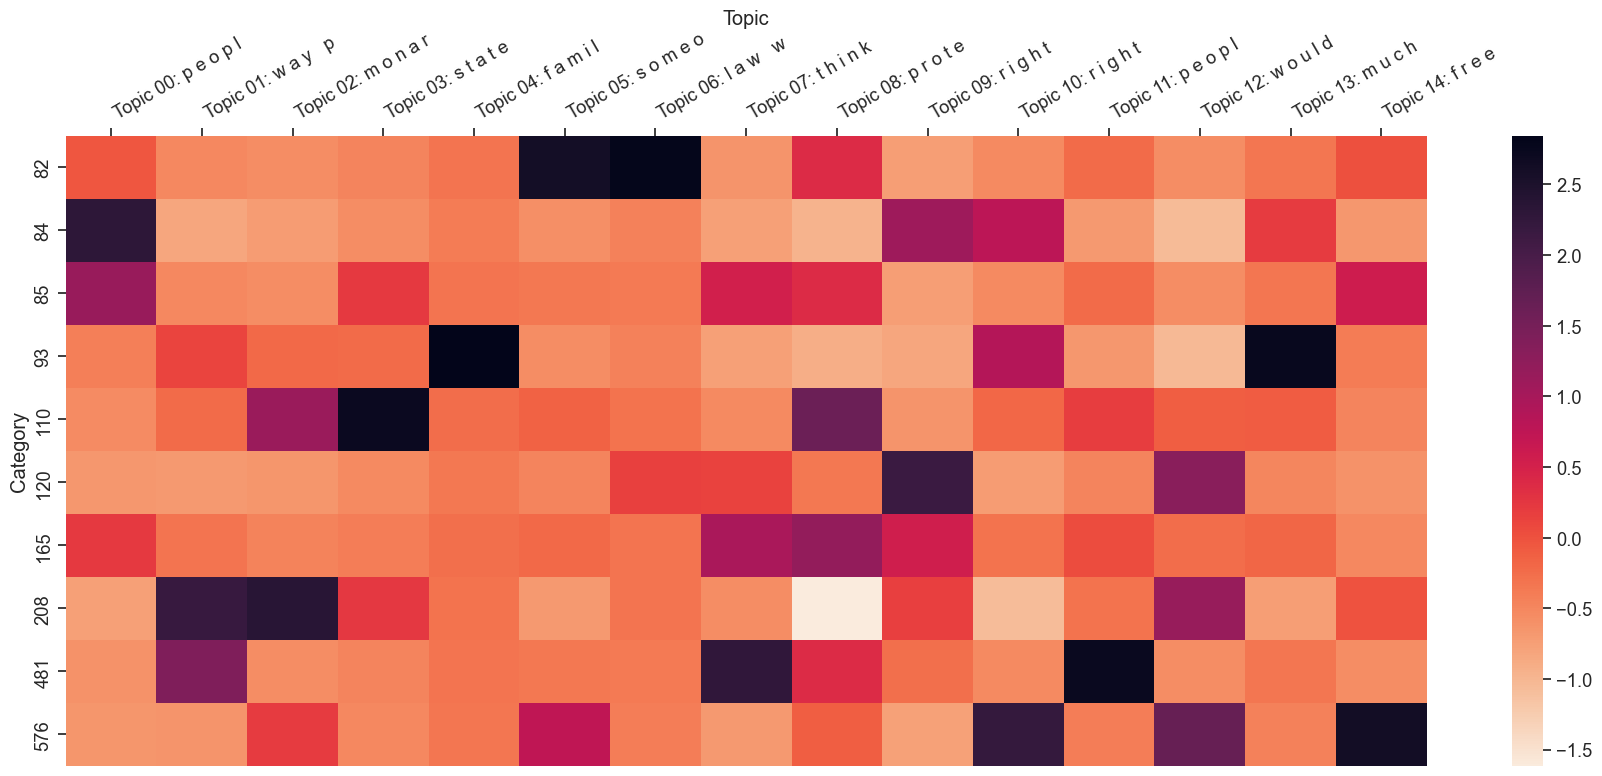

In [162]:
upvotesH_text = [title for title in posts_df['Upvotes'] if title>80]
target_labelS = random.sample(upvotesH_text, 10)
little_mallet_wrapper.plot_categories_by_topics_heatmap(upvotesH_text,
                                      topic_distributions,
                                      topics, 
                                      output_path=None,
                                      target_labels=target_labelS,
                                      dim= (18, 8)
                                     )

##### Generated Heatmap

We can infer from the map that the comment with the highest number of upvotes (576) is most closely associated with topics 10 and 14. These topics were: 
- Topic 10: The right to peaceful protest is in jeopardy
- Topic 14: Right to freedom of speech and to disagree 

Although, in the previous heatmap generated on the comments, it can be inferred thata the comment is most closely associated with: 
- Topic 6: Peaceful protest is an equal right of the people, regardless the issue
- Topic 9: Support of the right to peaceful protest

The text of the comment was "Then watch as the right to peaceful protest is totally ignored they get dragged away. Can't have the filthy peasants spoiling the big day can we?" I do think topics 10 and 14 help to describe the comment. The Reddit user behind the comment appears to believe that the right to peaceful protest would be ignored and that the monarchy is removed from the general public. Topic 6 is very similar to Topic 14 and Topic 9. Interestingly, the comment is very sarcastic and it is not immediately apparent that it is supportive of the protest but it is, and the model somehow appears to pick it up.  

**It is important to note** that the model did not take into account the upvotes for each comment but rather reflected general topics inferred from all 496 comments. Nevertheless, all 15 topics appear to reflect the sentiment of the comments with most upvotes which were supportive of the protest.  


In [167]:
topic_results = []
for target_labels, topic_distribution in zip(target_labels, topic_distributions):
    topic_results.append({'document': target_labels, 'topic_distribution': topic_distribution})

heatmap_df = pd.DataFrame(topic_results)
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]
heatmap_df[column_names] = pd.DataFrame(heatmap_df['topic_distribution'].tolist(), index = heatmap_df.index)
heatmap_df = heatmap_df.drop('topic_distribution', axis='columns')

#modified code from https://github.com/rskrisel/topic_modeling_workshop
#I converted the heatmap into a Pandas DataFrame as another method to view the probability of a comment associated with a particular topic being upvoted

In [168]:
heatmap_df

document  Topic 0 people change police ever  \
0         0                           0.138423   
1         0                           0.022171   
2        -4                           0.017788   
3         3                           0.004561   
4         1                           0.015716   
5        40                           0.268596   
6        10                           0.050445   
7        -4                           0.104313   
8         8                           0.430575   
9        12                           0.033020   

   Topic 1 way power even monarch  Topic 2 monarchy country government people  \
0                        0.032969                                    0.032894   
1                        0.106986                                    0.024788   
2                        0.019932                                    0.085789   
3                        0.140306                                    0.258589   
4                        0.017611                                    0.017571   
5                        0.024844                                    0.024788   
6                        0.051738                                    0.051711   
7                        0.024844                                    0.024788   
8                        0.011556                                    0.011529   
9                        0.037002                                    0.159256   

   Topic 3 state taken comment head  Topic 4 family royal cost tax  \
0                          0.029189                       0.024983   
1                          0.021996                       0.018827   
2                          0.017647                       0.015105   
3                          0.105921                       0.020773   
4                          0.015592                       0.013346   
5                          0.104138                       0.018827   
6                          0.050361                       0.446061   
7                          0.021996                       0.018827   
8                          0.010231                       0.008757   
9                          0.399773                       0.028040   

   Topic 5 someone point king may  Topic 6 law would see coronation  \
0                        0.031240                          0.019757   
1                        0.023542                          0.014888   
2                        0.084789                          0.011945   
3                        0.004843                          0.019962   
4                        0.016688                          0.068781   
5                        0.023542                          0.014888   
6                        0.011385                          0.007200   
7                        0.187825                          0.343454   
8                        0.010950                          0.006925   
9                        0.035062                          0.022174   

   Topic 7 think protesting one said  Topic 8 protesters //www starmer yeah  \
0                           0.257950                               0.018303   
1                           0.440809                               0.013793   
2                           0.024150                               0.011066   
3                           0.039991                               0.002838   
4                           0.137792                               0.009777   
5                           0.194384                               0.013793   
6                           0.014557                               0.006670   
7                           0.030101                               0.013793   
8                           0.014001                               0.006415   
9                           0.044831                               0.020542   

   Topic 9 right day rights support  Topic 10 right yes feel threatened  \
0                          0.262900                           

In [169]:
upvotes_text = [title for title in posts_df['Upvotes']]
target_labels = upvotes_text
topic_results = []
for target_labels, topic_distribution in zip(target_labels, topic_distributions):
    topic_results.append({'document': target_labels, 'topic_distribution': topic_distribution})

heatmapA_df = pd.DataFrame(topic_results)
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]
heatmapA_df[column_names] = pd.DataFrame(heatmapA_df['topic_distribution'].tolist(), index = heatmapA_df.index)
heatmapA_df = heatmapA_df.drop('topic_distribution', axis='columns')

#modified code from https://github.com/rskrisel/topic_modeling_workshop
#the "document" column reflects upvotes

In [170]:
heatmapA_df[:10]

document  Topic 0 people change police ever  \
0        61                           0.138423   
1       165                           0.022171   
2       481                           0.017788   
3        23                           0.004561   
4       576                           0.015716   
5       208                           0.268596   
6       120                           0.050445   
7        14                           0.104313   
8         5                           0.430575   
9        45                           0.033020   

   Topic 1 way power even monarch  Topic 2 monarchy country government people  \
0                        0.032969                                    0.032894   
1                        0.106986                                    0.024788   
2                        0.019932                                    0.085789   
3                        0.140306                                    0.258589   
4                        0.017611                                    0.017571   
5                        0.024844                                    0.024788   
6                        0.051738                                    0.051711   
7                        0.024844                                    0.024788   
8                        0.011556                                    0.011529   
9                        0.037002                                    0.159256   

   Topic 3 state taken comment head  Topic 4 family royal cost tax  \
0                          0.029189                       0.024983   
1                          0.021996                       0.018827   
2                          0.017647                       0.015105   
3                          0.105921                       0.020773   
4                          0.015592                       0.013346   
5                          0.104138                       0.018827   
6                          0.050361                       0.446061   
7                          0.021996                       0.018827   
8                          0.010231                       0.008757   
9                          0.399773                       0.028040   

   Topic 5 someone point king may  Topic 6 law would see coronation  \
0                        0.031240                          0.019757   
1                        0.023542                          0.014888   
2                        0.084789                          0.011945   
3                        0.004843                          0.019962   
4                        0.016688                          0.068781   
5                        0.023542                          0.014888   
6                        0.011385                          0.007200   
7                        0.187825                          0.343454   
8                        0.010950                          0.006925   
9                        0.035062                          0.022174   

   Topic 7 think protesting one said  Topic 8 protesters //www starmer yeah  \
0                           0.257950                               0.018303   
1                           0.440809                               0.013793   
2                           0.024150                               0.011066   
3                           0.039991                               0.002838   
4                           0.137792                               0.009777   
5                           0.194384                               0.013793   
6                           0.014557                               0.006670   
7                           0.030101                               0.013793   
8                           0.014001                               0.006415   
9                           0.044831                               0.020542   

   Topic 9 right day rights support  Topic 10 right yes feel threatened  \
0                          0.262900                           

In [171]:
heatmapA_df.sort_values(by='Topic 3 state taken comment head', ascending=False)[:10]

#sorting the DataFrame by Topic 3 to see how many upvotes or downvotes were given to comments associted with this topic
#displaying only top 10 results

document  Topic 0 people change police ever  \
484         1                           0.011647   
281         2                           0.011647   
421        -1                           0.073943   
393         2                           0.033020   
480         2                           0.026529   
296        16                           0.026529   
440       -22                           0.037623   
394        21                           0.026529   
9          45                           0.033020   
373         5                           0.043717   

     Topic 1 way power even monarch  \
484                        0.013052   
281                        0.013052   
421                        0.017611   
393                        0.037002   
480                        0.029728   
296                        0.029728   
440                        0.042160   
394                        0.029728   
9                          0.037002   
373                        0.048988   

     Topic 2 monarchy country government people  \
484                                    0.013022   
281                                    0.013022   
421                                    0.017571   
393                                    0.036918   
480                                    0.029661   
296                                    0.029661   
440                                    0.042064   
394                                    0.029661   
9                                      0.159256   
373                                    0.048877   

     Topic 3 state taken comment head  Topic 4 family royal cost tax  \
484                          0.831436                       0.009890   
281                          0.831436                       0.009890   
421                          0.714319                       0.013346   
393                          0.522110                       0.028040   
480                          0.517764                       0.022528   
296                          0.517764                       0.022528   
440                          0.455497                       0.031948   
394                          0.419475                       0.022528   
9                            0.399773                       0.028040   
373                          0.367306                       0.037123   

     Topic 5 someone point king may  Topic 6 law would see coronation  \
484                        0.012367                          0.007821   
281                        0.012367                          0.007821   
421                        0.016688                          0.010554   
393                        0.035062                          0.022174   
480                        0.028170                          0.017815   
296                        0.028170                          0.017815   
440                        0.039949                          0.025264   
394                        0.028170                          0.017815   
9                          0.035062                          0.022174   
373                        0.046420                          0.029356   

     Topic 7 think protesting one said  Topic 8 protesters //www starmer yeah  \
484                           0.015813                               0.007246   
281                           0.015813                               0.007246   
421                           0.021338                               0.009777   
393                           0.044831                               0.020542   
480                           0.134307                               0.016504   
296                           0.134307                               0.016504   
440                           0.051081                               0.023406   
394                           0.232596                               0.016504   
9                             0.044831                               0.020542   
373                           0.0

In [172]:
heatmapA_df.sort_values(by='Topic 7 think protesting one said', ascending=False)[:10]

#sorting the DataFrame by Topic 7 to see how many upvotes or downvotes were given to comments associted with this topic
#displaying only the top 10 results

document  Topic 0 people change police ever  \
225       -30                           0.008945   
297        38                           0.113648   
209        10                           0.029421   
276         2                           0.029421   
305        19                           0.112083   
43         -2                           0.022171   
1         165                           0.022171   
334         1                           0.223107   
82          3                           0.047119   
237         2                           0.033020   

     Topic 1 way power even monarch  \
225                        0.010024   
297                        0.027068   
209                        0.032969   
276                        0.032969   
305                        0.044644   
43                         0.024844   
1                          0.106986   
334                        0.029728   
82                         0.006278   
237                        0.037002   

     Topic 2 monarchy country government people  \
225                                    0.010001   
297                                    0.027006   
209                                    0.032894   
276                                    0.032894   
305                                    0.010344   
43                                     0.024788   
1                                      0.024788   
334                                    0.029661   
82                                     0.006264   
237                                    0.036918   

     Topic 3 state taken comment head  Topic 4 family royal cost tax  \
225                          0.008875                       0.040737   
297                          0.023965                       0.020512   
209                          0.029189                       0.024983   
276                          0.029189                       0.024983   
305                          0.009179                       0.007856   
43                           0.021996                       0.018827   
1                            0.021996                       0.018827   
334                          0.026320                       0.022528   
82                           0.005559                       0.004758   
237                          0.032760                       0.028040   

     Topic 5 someone point king may  Topic 6 law would see coronation  \
225                        0.042639                          0.006007   
297                        0.025649                          0.016220   
209                        0.031240                          0.019757   
276                        0.031240                          0.019757   
305                        0.146932                          0.006213   
43                         0.187825                          0.014888   
1                          0.023542                          0.014888   
334                        0.028170                          0.017815   
82                         0.005949                          0.024520   
237                        0.035062                          0.022174   

     Topic 7 think protesting one said  Topic 8 protesters //www starmer yeah  \
225                           0.774388                               0.005565   
297                           0.480258                               0.015027   
209                           0.475954                               0.018303   
276                           0.475954                               0.018303   
305                           0.458162                               0.040033   
43                            0.440809                               0.013793   
1                             0.440809                               0.013793   
334                           0.429173                               0.016504   
82                            0.422768                               0.211066   
237                           0.4

In [173]:
heatmapA_df.sort_values(by='document', ascending=False)[:10]

#sorting the DataFrame by the number of upvotes and downvotes to see which topics best correspond to the upvoting pattern
#displaying only the top 10 results
#similar to the heatmap created but now showing actual probability values rather than color density

document  Topic 0 people change police ever  \
4         576                           0.015716   
2         481                           0.017788   
5         208                           0.268596   
141       200                           0.043717   
1         165                           0.022171   
6         120                           0.050445   
102       110                           0.016688   
44         93                           0.037623   
40         85                           0.202170   
68         84                           0.172301   

     Topic 1 way power even monarch  \
4                          0.017611   
2                          0.019932   
5                          0.024844   
141                        0.048988   
1                          0.106986   
6                          0.051738   
102                        0.018700   
44                         0.042160   
40                         0.018700   
68                         0.022958   

     Topic 2 monarchy country government people  \
4                                      0.017571   
2                                      0.085789   
5                                      0.024788   
141                                    0.048877   
1                                      0.024788   
6                                      0.051711   
102                                    0.018658   
44                                     0.042064   
40                                     0.080485   
68                                     0.098813   

     Topic 3 state taken comment head  Topic 4 family royal cost tax  \
4                            0.015592                       0.013346   
2                            0.017647                       0.015105   
5                            0.104138                       0.018827   
141                          0.043372                       0.037123   
1                            0.021996                       0.018827   
6                            0.050361                       0.446061   
102                          0.016556                       0.014171   
44                           0.037327                       0.031948   
40                           0.140211                       0.014171   
68                           0.020327                       0.017398   

     Topic 5 someone point king may  Topic 6 law would see coronation  \
4                          0.016688                          0.068781   
2                          0.084789                          0.011945   
5                          0.023542                          0.014888   
141                        0.046420                          0.029356   
1                          0.023542                          0.014888   
6                          0.011385                          0.007200   
102                        0.017720                          0.011206   
44                         0.039949                          0.025264   
40                         0.017720                          0.011206   
68                         0.173568                          0.013758   

     Topic 7 think protesting one said  Topic 8 protesters //www starmer yeah  \
4                             0.137792                               0.009777   
2                             0.024150                               0.011066   
5                             0.194384                               0.013793   
141                           0.059354                               0.027197   
1                             0.440809                               0.013793   
6                             0.014557                               0.006670   
102                           0.022657                               0.010382   
44                            0.051081                               0.023406   
40                            0.084484                               0.010382   
68                            0.0

In [174]:
heatmapA_df.to_csv('Topic-Distributions.csv', encoding='utf-8', index=False)

#saving the new DataFrame as a .csv file

### Discussion and Conclusion

:heart_eyes_cat:You made it to the end of my first coding experience. Congrats!

What do we learn from analyzing the comment section (496 comments sample) under the "Anti-monarchy group to stage protest along Charles' coronation route" submission with Word Cloud and Topic Modelling? 

1. Overall, on this small sample of comments, we got similar results from topics generated via Topic Modeling and inferred from the created Word Clouds.  

2. The main topics from the comments can be summarized as:
 - Peaceful protest is a right, just as the freedom of speech
 - The role of monarchy today and its relationship with the public are up to debate
 - The right of freedom of speech may be in jeopardy in today's society 
 - If people are protesting, perhaps, there is a reason

3. Generally, the most upvoted comments were supportive of the protest and reflected the overall discussion among 496 comments, based on the analysis.

4. Generally, the most downvoted comments condemned the protest and stated that it was a disrespectful act towards Queen Elizabeth II or even a personal harassment of King Charles. The most downvoted comments did not appear to be reflected in the generated topics, which may imply that most Reddit users in the discussion were indeed supportive of the protest and which is why the anti-protest comments got so many downvotes. 

5. We also see that many comments are written sarcastically and with many grammar mistakes or slang, so it is hard to run a standard code. More data cleaning and work on the data is needed.  

6. By analyzing just the text of the comments, we do not necessarily have the entire context to be able to understand the entire discussion. 

It was an interesting experience getting and analyzing the comments, and I believe the data analysis tools, such as the Word Cloud and Topic Modeling, enabled me to have a better understanding of the topics discussed in the sample of 496 comments as well as explain the voting pattern to some extent.

:sunflower: :sunflower: :sunflower: